In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def plot_ap(res):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel('threshold [m]', fontsize=14)
    ax.set_ylabel('Average Precision', fontsize=14)

    for cls, ap_dict in res['ap'].items():
        thrs = [t.replace('m', '') for t in ap_dict.keys()]
        ax.plot(thrs, ap_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()
    
    
def plot_precision_recall(res):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('recall', fontsize=14)
    ax.set_ylabel('precision', fontsize=14)

    for cls in res['precision'].keys():
        rec_dict = res['recall'][cls]
        prec_dict = score_dict['0.5']
        thrs = [t.replace('m', '') for t in prec_dict.keys()]
        ax.plot(thrs, prec_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()

In [39]:
res_cls = read_json('data/result_IA_vs_videocoding/results_cls.json')
res_det = read_json('data/result_IA_vs_videocoding/results_det.json')
res_seg = read_json('data/result_IA_vs_videocoding/results_seg.json')
res_videocoder = read_json('data/result_IA_vs_videocoding/results_videocoder.json')

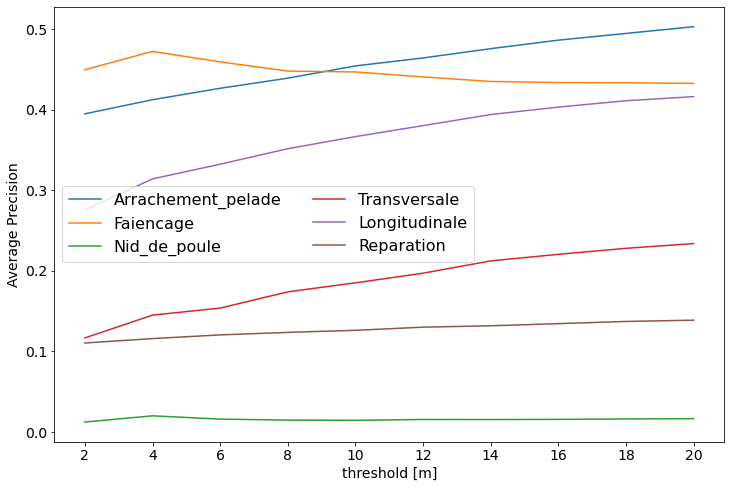

In [22]:
plot_ap(res_cls)

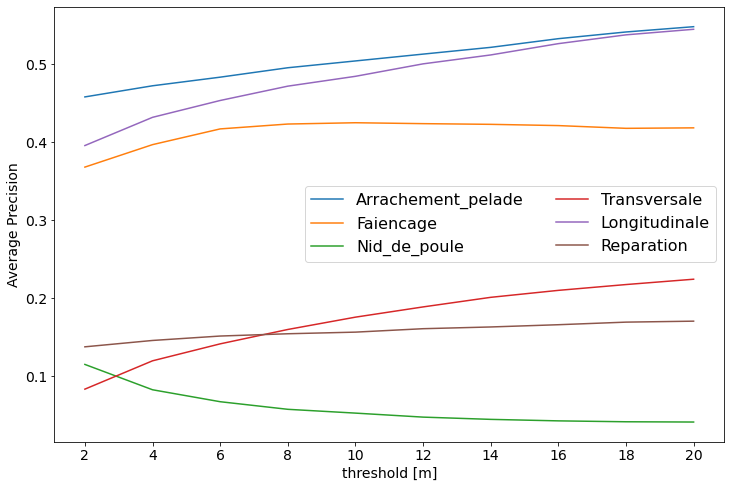

In [23]:
plot_ap(res_det)

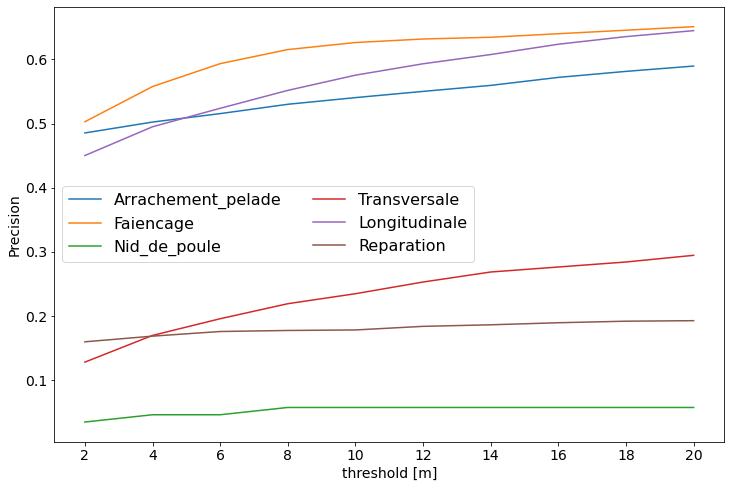

In [20]:
plot_precision_recall(res_det, 'precision', 'Precision')


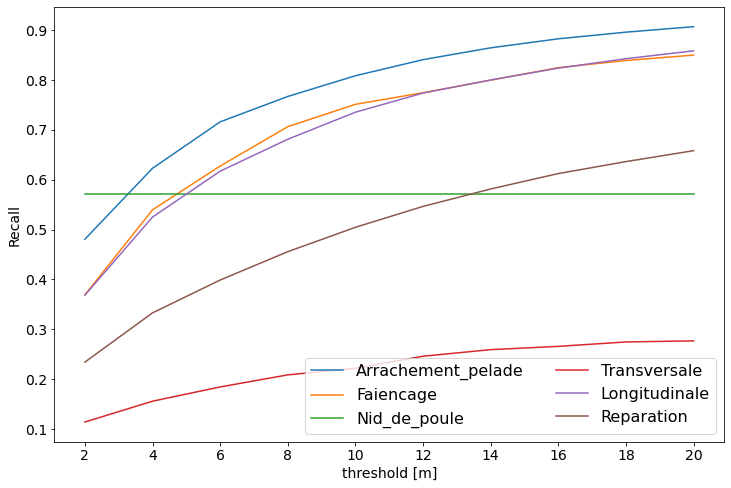

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('threshold [m]', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)

for cls, score_dict in res_det['recall'].items():
    prec_dict = score_dict['0.5']
    thrs = [t.replace('m', '') for t in prec_dict.keys()]
    ax.plot(thrs, prec_dict.values(), label=cls)
    
ax.legend(fontsize=16, ncol=2)
ax.tick_params(axis='both', which='major', labelsize=14)

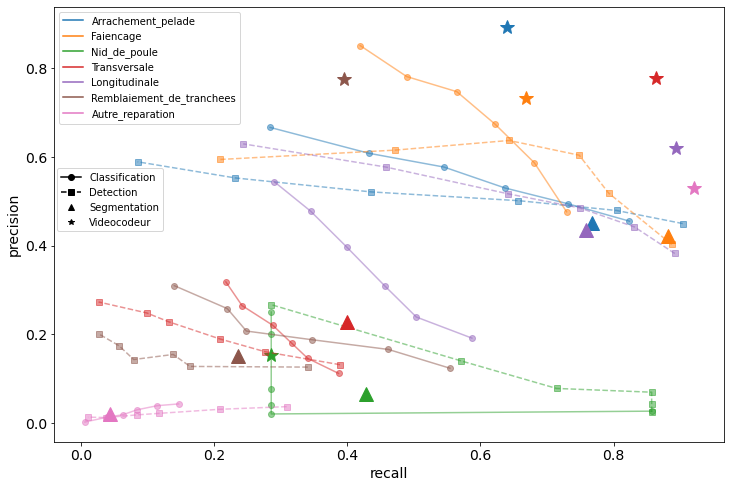

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_cls['precision'].keys():
    recall_list_cls = [ res_cls['recall'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    precision_list_cls = [ res_cls['precision'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    line, = ax.plot(recall_list_cls, precision_list_cls, marker='o', alpha=0.5)
    
    recall_list_det = [ res_det['recall'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    precision_list_det = [ res_det['precision'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    ax.plot(recall_list_det, precision_list_det, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
    
    seg_recall = [res_seg['recall'][cls]['0.0']['6m']]
    seg_precision = [res_seg['precision'][cls]['0.0']['6m']]
    ax.plot(seg_recall, seg_precision, color=line.get_color(), marker='^', markersize=14)

    vid_recall = [res_videocoder['recall'][cls]['6m']]
    vid_precision = [res_videocoder['precision'][cls]['6m']]
    ax.plot(vid_recall, vid_precision, color=line.get_color(), marker='*', markersize=14)
    
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='upper left')
ax.add_artist(cl)

cls_legend = mlines.Line2D([], [], color='black', marker='o', label='Classification')
det_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection')
seg_legend = mlines.Line2D([], [], color='black', marker='^', linestyle='', label='Segmentation')
vid_legend = mlines.Line2D([], [], color='black', marker='*', linestyle='', label='Videocodeur')
ax.legend(handles=[cls_legend, det_legend, seg_legend, vid_legend], bbox_to_anchor=(0.17, 0.64))
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## compare detection performance before and after updating annotations

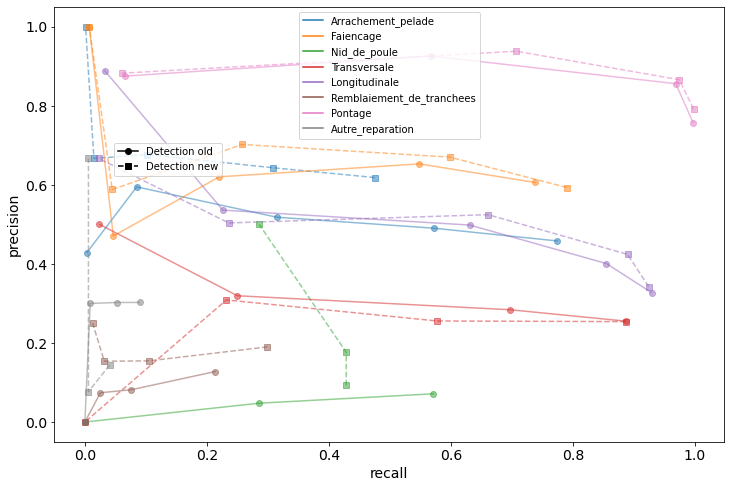

In [5]:
res_det_old = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230301.json')
res_det_new = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230327.json')

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_det_new['precision'].keys():
    try:
        recall_list_det_old = [ res_det_old['recall'][cls][score]['6m'] for score in res_det_old['recall'][cls].keys() ]
        precision_list_det_old = [ res_det_old['precision'][cls][score]['6m'] for score in res_det_old['recall'][cls].keys() ]
        line, = ax.plot(recall_list_det_old, precision_list_det_old, marker='o', alpha=0.5)
    except:
        print('')
    
    recall_list_det_new = [ res_det_new['recall'][cls][score]['6m'] for score in res_det_new['recall'][cls].keys() ]
    precision_list_det_new = [ res_det_new['precision'][cls][score]['6m'] for score in res_det_new['recall'][cls].keys() ]
    ax.plot(recall_list_det_new, precision_list_det_new, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
        
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='best')
ax.add_artist(cl)

det_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Detection old')
det_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection new')
ax.legend(handles=[det_old_legend, det_new_legend], bbox_to_anchor=(0.17, 0.6))
ax.tick_params(axis='both', which='major', labelsize=14)

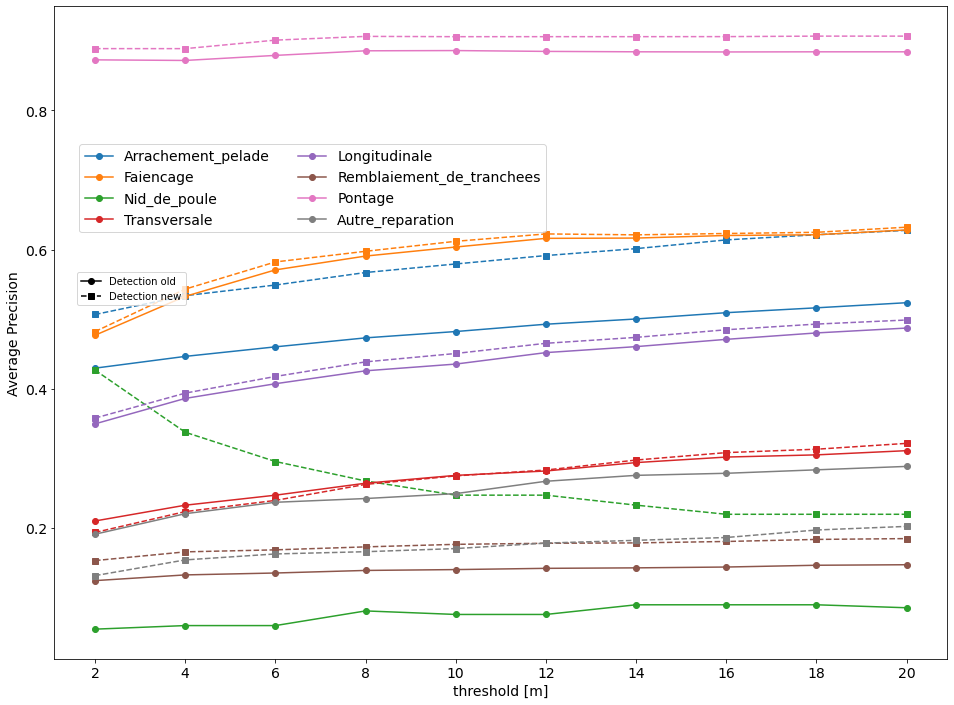

In [6]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_xlabel('threshold [m]', fontsize=14)
ax.set_ylabel('Average Precision', fontsize=14)

for cls, ap_dict in res_det_old['ap'].items():
    thrs = [t.replace('m', '') for t in ap_dict.keys()]
    line, = ax.plot(thrs, ap_dict.values(), label=cls, marker='o')
    ax.plot(thrs, res_det_new['ap'][cls].values(), marker='s', linestyle='--', color=line.get_color())

cl = ax.legend(fontsize=14, ncol=2, loc='upper left', bbox_to_anchor=(0.02, 0.8))
ax.add_artist(cl)

det_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Detection old')
det_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection new')
ax.legend(handles=[det_old_legend, det_new_legend], loc='upper left', bbox_to_anchor=(0.02, 0.6))

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

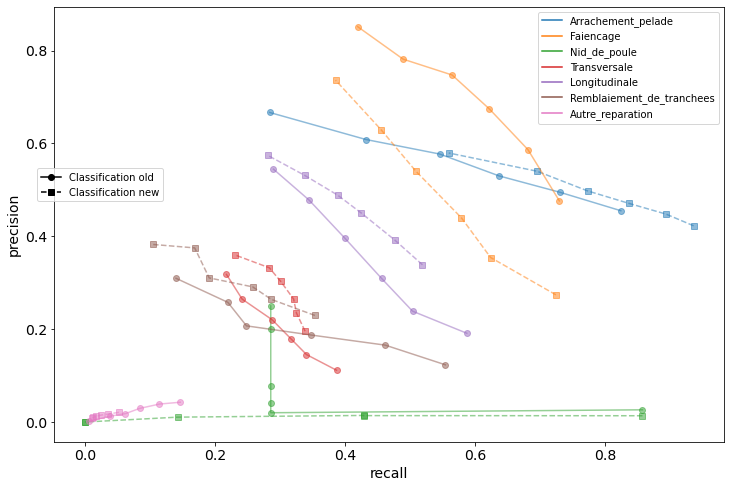

In [9]:
res_cls_old = read_json('data/result_IA_vs_videocoding/202210/results_cls.json')
res_cls_new = read_json('data/result_IA_vs_videocoding/20221110/results_cls.json')

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_cls_new['precision'].keys():
    recall_list_cls_old = [ res_cls_old['recall'][cls][score]['6m'] for score in res_cls_old['recall'][cls].keys() ]
    precision_list_cls_old = [ res_cls_old['precision'][cls][score]['6m'] for score in res_cls_old['recall'][cls].keys() ]
    line, = ax.plot(recall_list_cls_old, precision_list_cls_old, marker='o', alpha=0.5)
    
    recall_list_cls_new = [ res_cls_new['recall'][cls][score]['6m'] for score in res_cls_new['recall'][cls].keys() ]
    precision_list_cls_new = [ res_cls_new['precision'][cls][score]['6m'] for score in res_cls_new['recall'][cls].keys() ]
    ax.plot(recall_list_cls_new, precision_list_cls_new, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
        
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='best')
ax.add_artist(cl)

cls_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Classification old')
cls_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Classification new')
ax.legend(handles=[cls_old_legend, cls_new_legend], bbox_to_anchor=(0.17, 0.64))
ax.tick_params(axis='both', which='major', labelsize=14)

## Recall per video (score threshold=0.3, distance threshold=6m)

In [47]:
import glob
json_list = glob.glob('data/result_IA_vs_videocoding/20221116/*')
json_list.sort()
res_list = [read_json(vid) for vid in json_list]
name_list = [vid.split('/')[-1].replace('.json', '') for vid in json_list]

color_list = ['red', 'red', 'red', 
             'blue', 'blue', 'blue',
             'black', 'black', 'black',
             'm', 'm',
             'green', 'green', 'green']
marker_list = ['o', '^', 's',
              'o', '^', 's',
              'o', '^', 's',
              'o', '^',
              'o', '^', 's']

<ipython-input-55-af4f7ac453e2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes, rotation=45, ha='right')


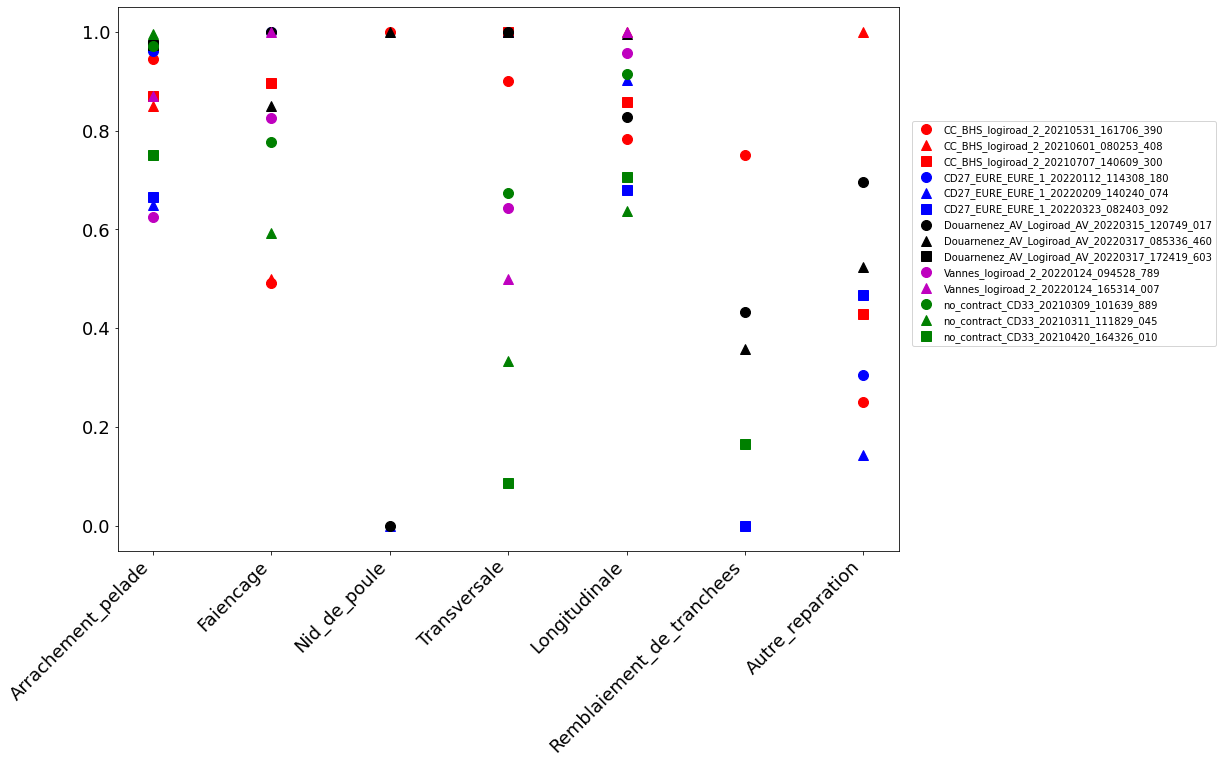

In [55]:
fig, ax = plt.subplots(figsize=(14,10))

for res, vid, marker, col in zip(res_list, name_list, marker_list, color_list):
    classes = list(res['recall'].keys())
    recall = [i['0.3']['6m'] for k,i in res['recall'].items()]
    ax.plot(classes, recall, marker=marker, color=col, linestyle='None', label=vid, markersize=10)

ax.set_xticklabels(classes, rotation=45, ha='right')   
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(bbox_to_anchor=(1.01, 0.8))

## extract class AP with 6m threshold

In [4]:
res_det = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230327.json')


for cls, ap_dict in res_det['ap'].items():
    print(cls, f'{ap_dict["6m"]:.3f}')


Arrachement_pelade 0.549
Faiencage 0.582
Nid_de_poule 0.296
Transversale 0.240
Longitudinale 0.418
Remblaiement_de_tranchees 0.169
Pontage 0.901
Autre_reparation 0.163
